In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [133]:
test = pd.read_csv("C:/Users/ssn/Desktop/Capstone Project/test_HR.csv")

In [134]:
train = pd.read_csv("C:/Users/ssn/Desktop/Capstone Project/train_HR.csv")

In [135]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [136]:
train.shape

(54808, 14)

In [137]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [138]:
train['education'] = train['education'].fillna(train['education'].mode()[0])

In [131]:
train['education'].mode()[0]

"Bachelor's"

In [80]:
def dataclean (train):
    train['education'] = train['education'].fillna(train['education'].mode()[0])
    return train
    

In [139]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(value= train['previous_year_rating'].mean())

In [140]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [141]:
train = train.drop(['employee_id','region','recruitment_channel'],axis=1)

In [142]:
train = pd.get_dummies(train, columns=['department','education','gender'])

In [118]:
train.shape

(54808, 22)

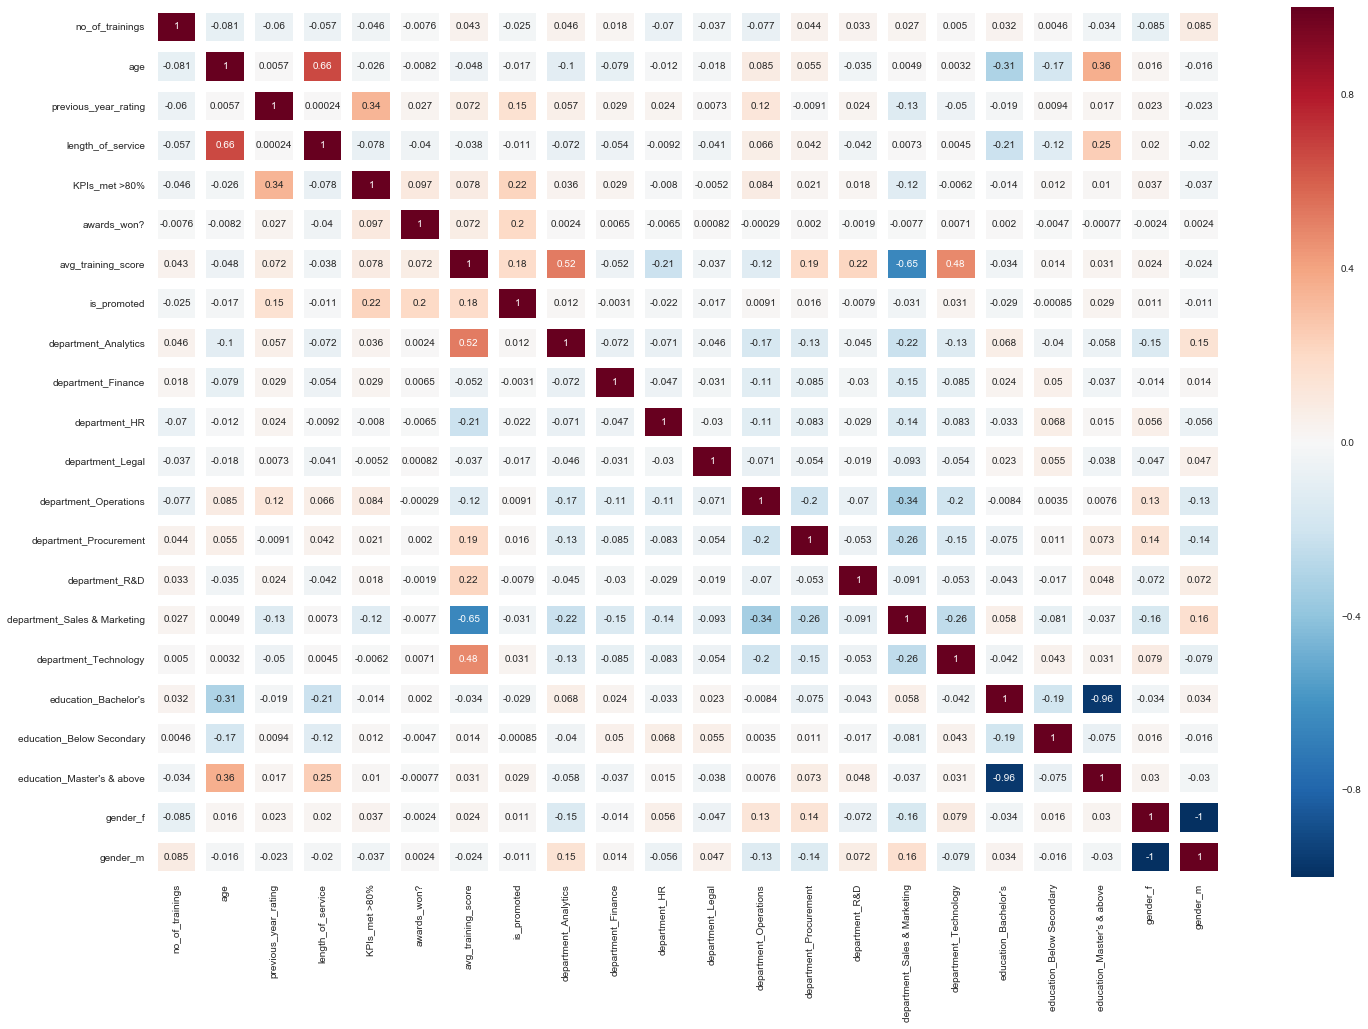

In [143]:
plt.figure(figsize=(24, 16))
sns.heatmap((train).corr(),annot=True,linewidths=10)

In [144]:
train.shape

(54808, 22)

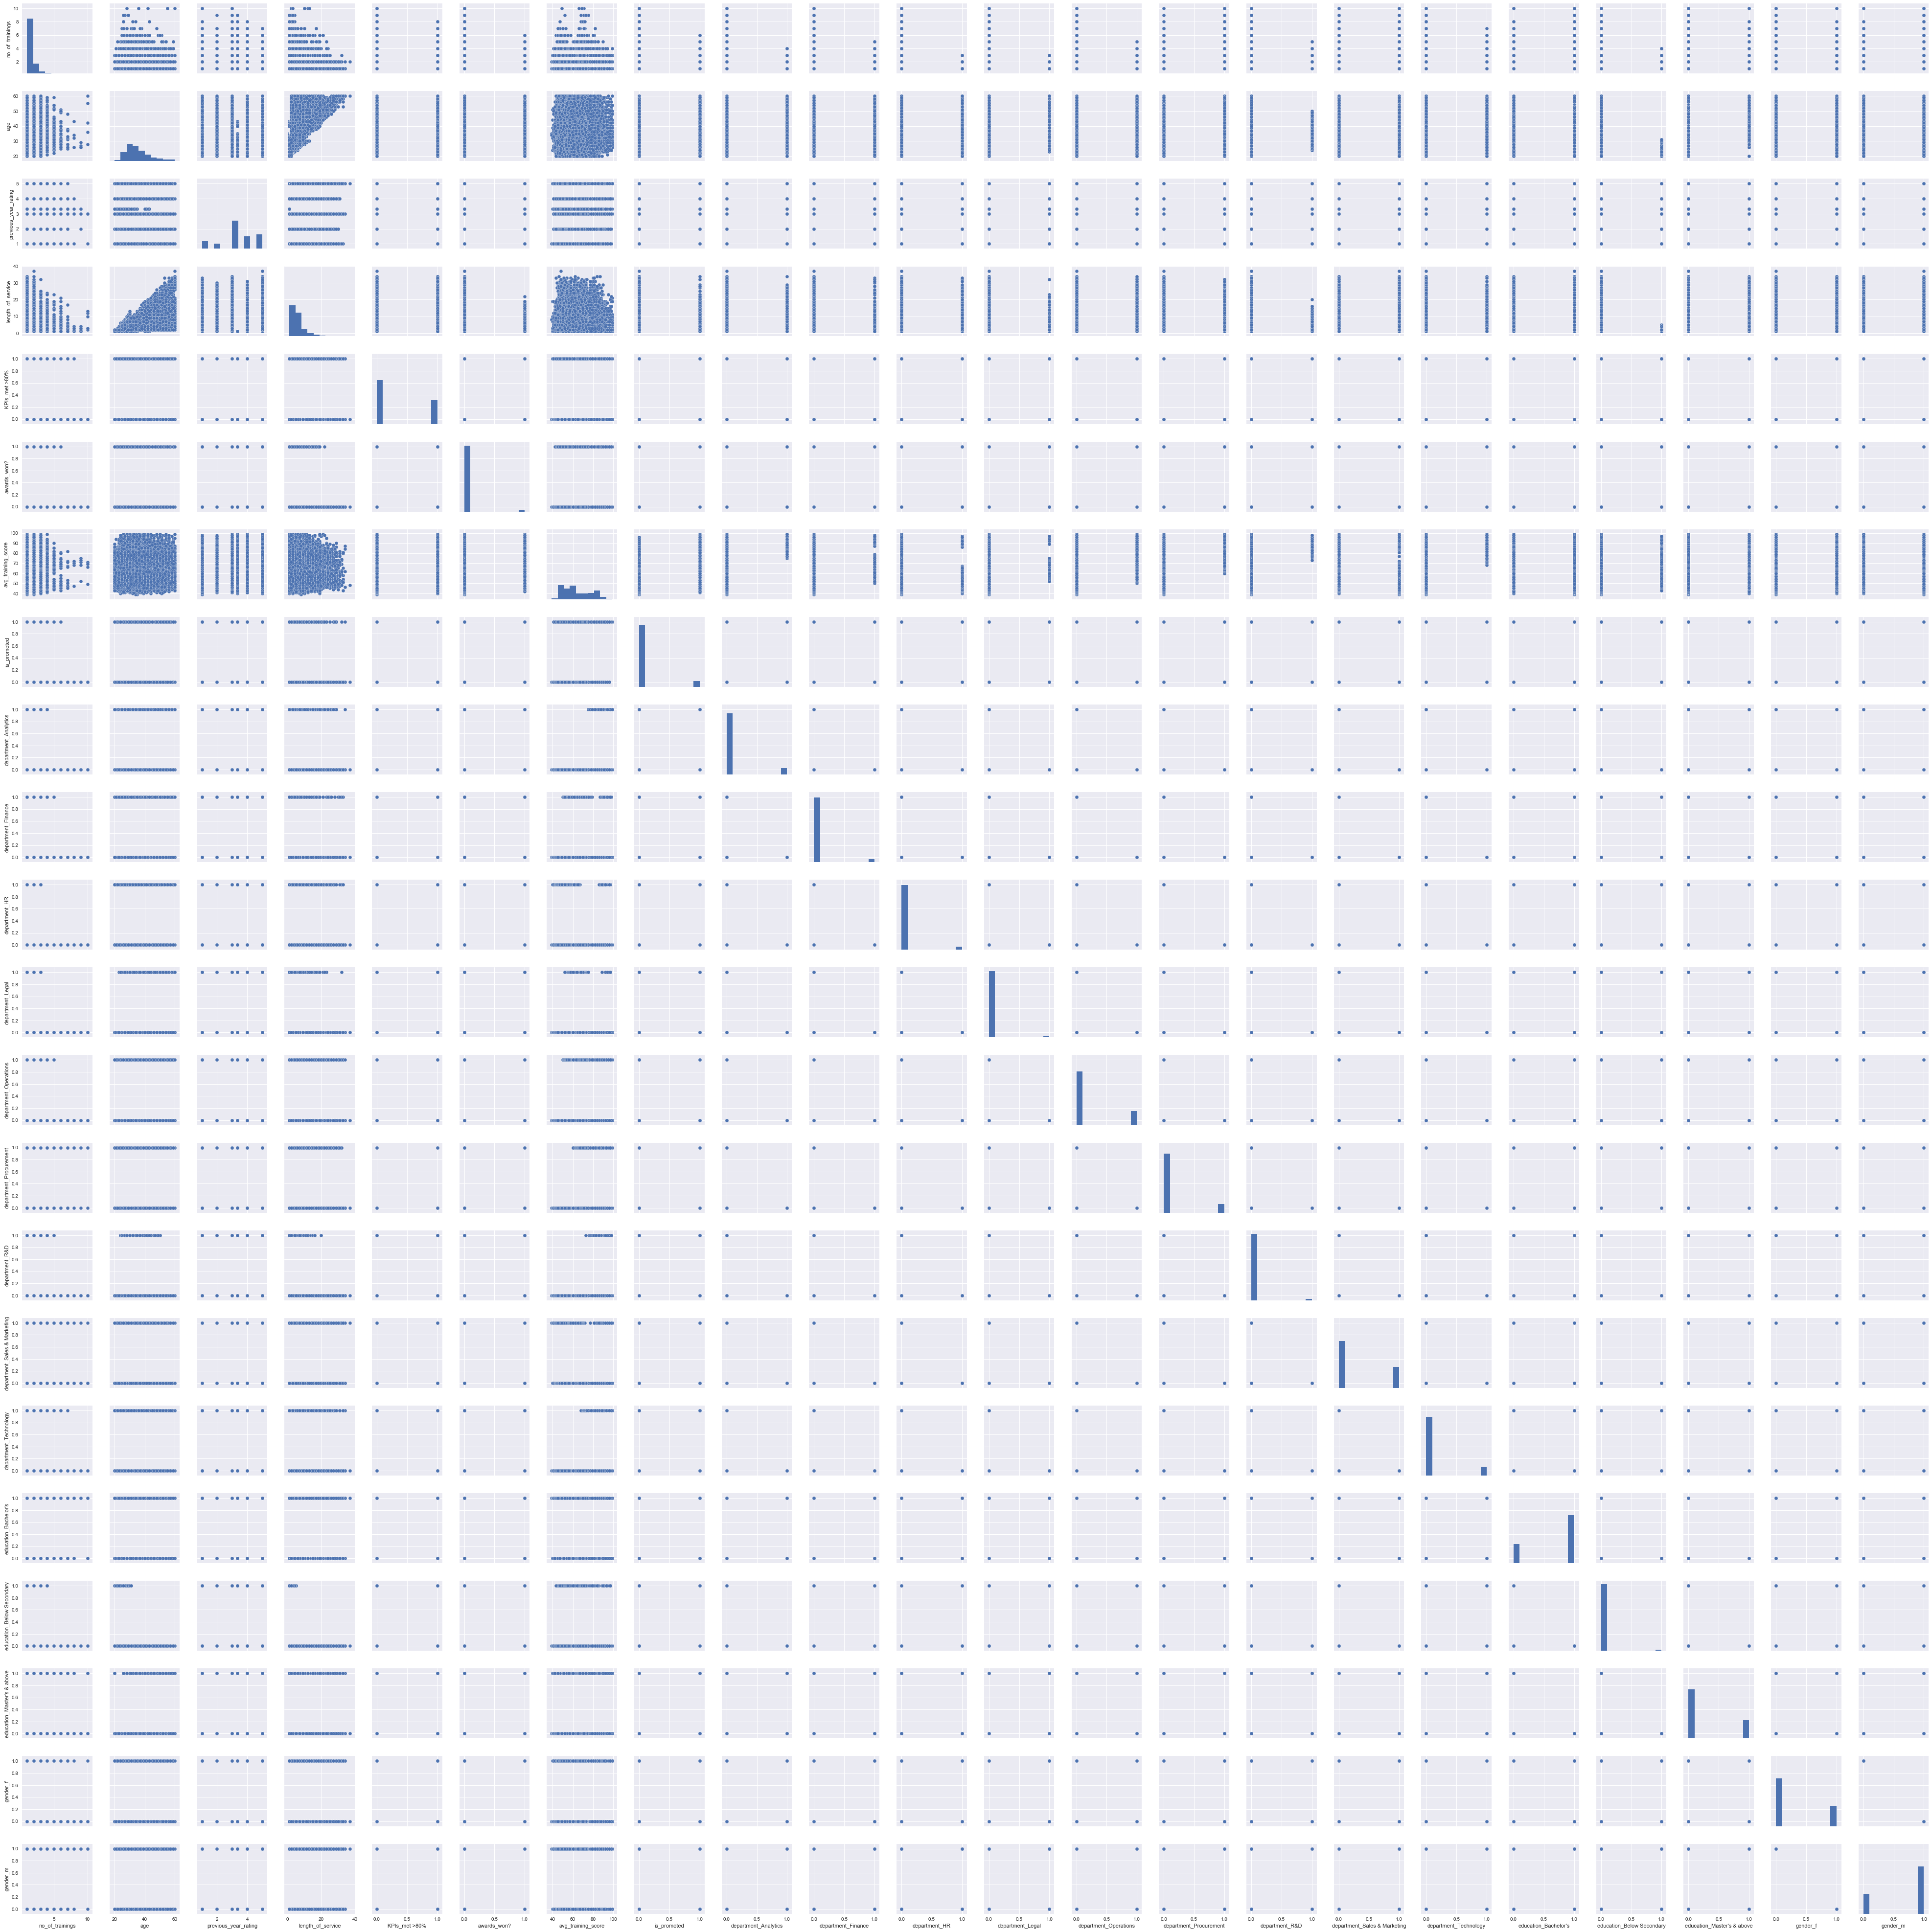

In [180]:
sns.pairplot(train)

In [145]:
train.skew()

no_of_trainings                 3.445434
age                             1.007432
previous_year_rating           -0.323028
length_of_service               1.738061
KPIs_met >80%                   0.619909
awards_won?                     6.338914
avg_training_score              0.451908
is_promoted                     2.972339
department_Analytics            2.710955
department_Finance              4.319899
department_HR                   4.440034
department_Legal                7.054982
department_Operations           1.446021
department_Procurement          2.197349
department_R&D                  7.203074
department_Sales & Marketing    0.835584
department_Technology           2.197349
education_Bachelor's           -0.941740
education_Below Secondary       8.068639
education_Master's & above      1.022988
gender_f                        0.885300
gender_m                       -0.885300
dtype: float64

In [146]:
x = train.drop(['is_promoted'],1)

In [147]:
x.shape

(54808, 21)

In [148]:
y = train['is_promoted']

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=123)

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
dtree = DecisionTreeClassifier()

In [152]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [153]:
predictions = dtree.predict(x_test)

In [154]:
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     16571
           1       0.42      0.45      0.43      1516

    accuracy                           0.90     18087
   macro avg       0.68      0.70      0.69     18087
weighted avg       0.90      0.90      0.90     18087

[[15615   956]
 [  832   684]]


In [156]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
rfc_pred = rfc.predict(x_test)

In [177]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16571
           1       0.67      0.36      0.47      1516

    accuracy                           0.93     18087
   macro avg       0.81      0.67      0.72     18087
weighted avg       0.92      0.93      0.92     18087

[[16299   272]
 [  967   549]]


In [178]:
from sklearn.metrics import precision_recall_fscore_support
all=precision_recall_fscore_support(y_test, rfc_pred, average='macro')


In [179]:
all

(0.80634534396453117, 0.67286149277857543, 0.71660819902164041, None)

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\ssn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
y_pred = classifier.predict(x_test)

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16513,    58],
       [ 1155,   361]], dtype=int64)

In [167]:
classifier.score(x_test,y_test)

0.93293525736716976

In [168]:
from sklearn.metrics import precision_recall_fscore_support
all=precision_recall_fscore_support(y_test, y_pred, average='macro')


In [169]:
all

(0.89810137713747551, 0.61731327927846735, 0.66884958921905768, None)

In [181]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [182]:
test['education'] = test['education'].fillna(test['education'].mode()[0])

In [183]:
test['previous_year_rating'] = test['previous_year_rating'].fillna(value= test['previous_year_rating'].mean())

In [185]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.339146,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.000000,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.000000,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.000000,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.000000,7,0,0,61


In [187]:
test = test.drop(['employee_id','region','recruitment_channel'],axis=1)

In [188]:
test = pd.get_dummies(test, columns=['department','education','gender'])

In [189]:
test.skew()

no_of_trainings                 3.299829
age                             1.011777
previous_year_rating           -0.338004
length_of_service               1.703001
KPIs_met >80%                   0.588650
awards_won?                     6.398053
avg_training_score              0.458113
department_Analytics            2.690693
department_Finance              4.310660
department_HR                   4.324417
department_Legal                7.057775
department_Operations           1.478315
department_Procurement          2.219529
department_R&D                  7.100133
department_Sales & Marketing    0.814577
department_Technology           2.224647
education_Bachelor's           -0.910704
education_Below Secondary       7.735070
education_Master's & above      0.997324
gender_f                        0.907093
gender_m                       -0.907093
dtype: float64

In [190]:
x = test

In [191]:
y_pred = classifier.predict(x)